<a href="https://colab.research.google.com/github/darshan-jain/19CSE304-FDS/blob/main/DS_Case_Study_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 4 of Case Study Project for Foundations of Data Science Course

Importing header files

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#import pandas_profiling as ppf
%matplotlib inline

In [29]:
df=pd.read_csv("https://raw.githubusercontent.com/darshan-jain/19CSE304-FDS/main/CardioGoodFitness.csv")

Basic Commands to Understand the dataset

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [13]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No null values in the dataset.

EDA : 

In [14]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Observations: 

Age lies between 18 and 50 with the mean being approx 29. 

As there is not much difference in mean and median, the skewness in data is minimal

Customers with income range of USD 29,500 to USD 104,500 are using treadmill

Considering the difference between mean and median & mean being greater than median, the data is right skewed

Standard deviation is very high

In [16]:
df.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

TM195 is the most sold model

TM798 is the least sold model

Similar analysis can be done using other fields such as Marital Status and Gender. 

In [17]:
df[df['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


Analysis for TM195 is done. 

In [18]:
df.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

Here analysis is done for Products based on age. 

we group by product based on the age and find the mean out. 

In [19]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


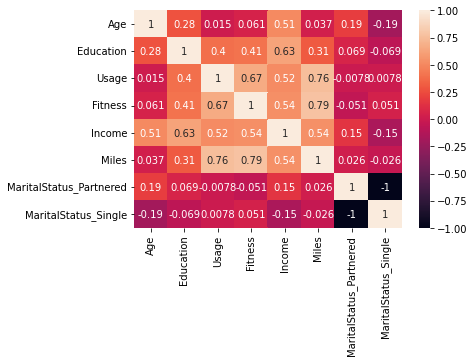

In [32]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax = 1) 
plt.show()


From the above snippets of code we derive the correlation between all the numerical columns

we observe that the following attributes show respective correlation amoung them:

Fitness and Miles  - High

Miles and Usage - High

Income and Usage - Low

Age and Usage - Low



Encoding:

In [30]:
df = pd.get_dummies(df, columns=['MaritalStatus'])
df.head()

,Product,Age,Gender,Education,Usage,Fitness,Income,Miles,MaritalStatus_Partnered,MaritalStatus_Single
0,TM195,18,Male,14,3,4,29562,112,0,1
1,TM195,19,Male,15,2,3,31836,75,0,1
2,TM195,19,Female,14,4,3,30699,66,1,0
3,TM195,19,Male,12,3,3,32973,85,0,1
4,TM195,20,Male,13,4,2,35247,47,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


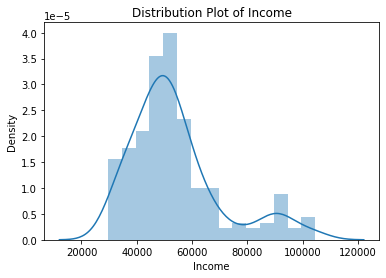

In [33]:
sns.distplot(df.Income)
plt.title("Distribution Plot of Income")
plt.show()

Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
df['Product']=label_enc.fit_transform(df['Product'])
df.head()

,Product,Age,Gender,Education,Usage,Fitness,Income,Miles,MaritalStatus_Partnered,MaritalStatus_Single
0,0,18,Male,14,3,4,29562,112,0,1
1,0,19,Male,15,2,3,31836,75,0,1
2,0,19,Female,14,4,3,30699,66,1,0
3,0,19,Male,12,3,3,32973,85,0,1
4,0,20,Male,13,4,2,35247,47,1,0


Skewdness:

In [36]:
df.skew(axis = 0, skipna = True)

Product                    0.416429
Age                        0.982161
Education                  0.622294
Usage                      0.739494
Fitness                    0.454800
Income                     1.291785
Miles                      1.724497
MaritalStatus_Partnered   -0.387943
MaritalStatus_Single       0.387943
dtype: float64

In [37]:
products = np.unique(df['Product'], return_counts=True)
print('products = {}\n'.format(products))

products = (array([0, 1, 2]), array([80, 60, 40]))



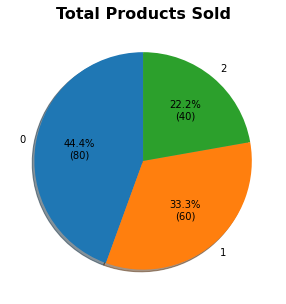

In [38]:
def spec(x):
    return '{:.1f}%\n({:.0f})'.format(x, np.sum(products[1])*x/100);

#create pie chart of products sold
fig = plt.figure(figsize=[5,5]);
patches, texts, autotexts = plt.pie(list(products[1]),labels=list(products[0]), autopct=spec, shadow=True, startangle=90);

plt.title('Total Products Sold', fontsize=16, fontweight='bold');

Hypotheses

Age and Product can be related .


Different Genders may prefer different product.


Fit people may have different product preference based on the features offered. 


Most Sold product and logical reasons behind it. 


We see that not many features are linearly related, so linear regression would not give us a good result for predictive analysis. 

Moreover, predictive analysis could be done better using decision tree since many of the features of this dataset are yes/no (binary) attributes. 


From this entire notebook, we come to understand the importance of data and how it could solve real-world business problems. 

